# double top

## read data and using zigzag to find pivot point

In [482]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zigzag import *

In [1510]:
df = pd.read_csv("EUR_JPY_M5_2005_202206.csv")


In [1537]:
X = df['high']
pivots = peak_valley_pivots(X, 0.01, -0.01)

In [1538]:
def plot_pivots(X, pivots):
    plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.xlim(0, len(X))
    plt.ylim(X.min()*0.99, X.max()*1.01)
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

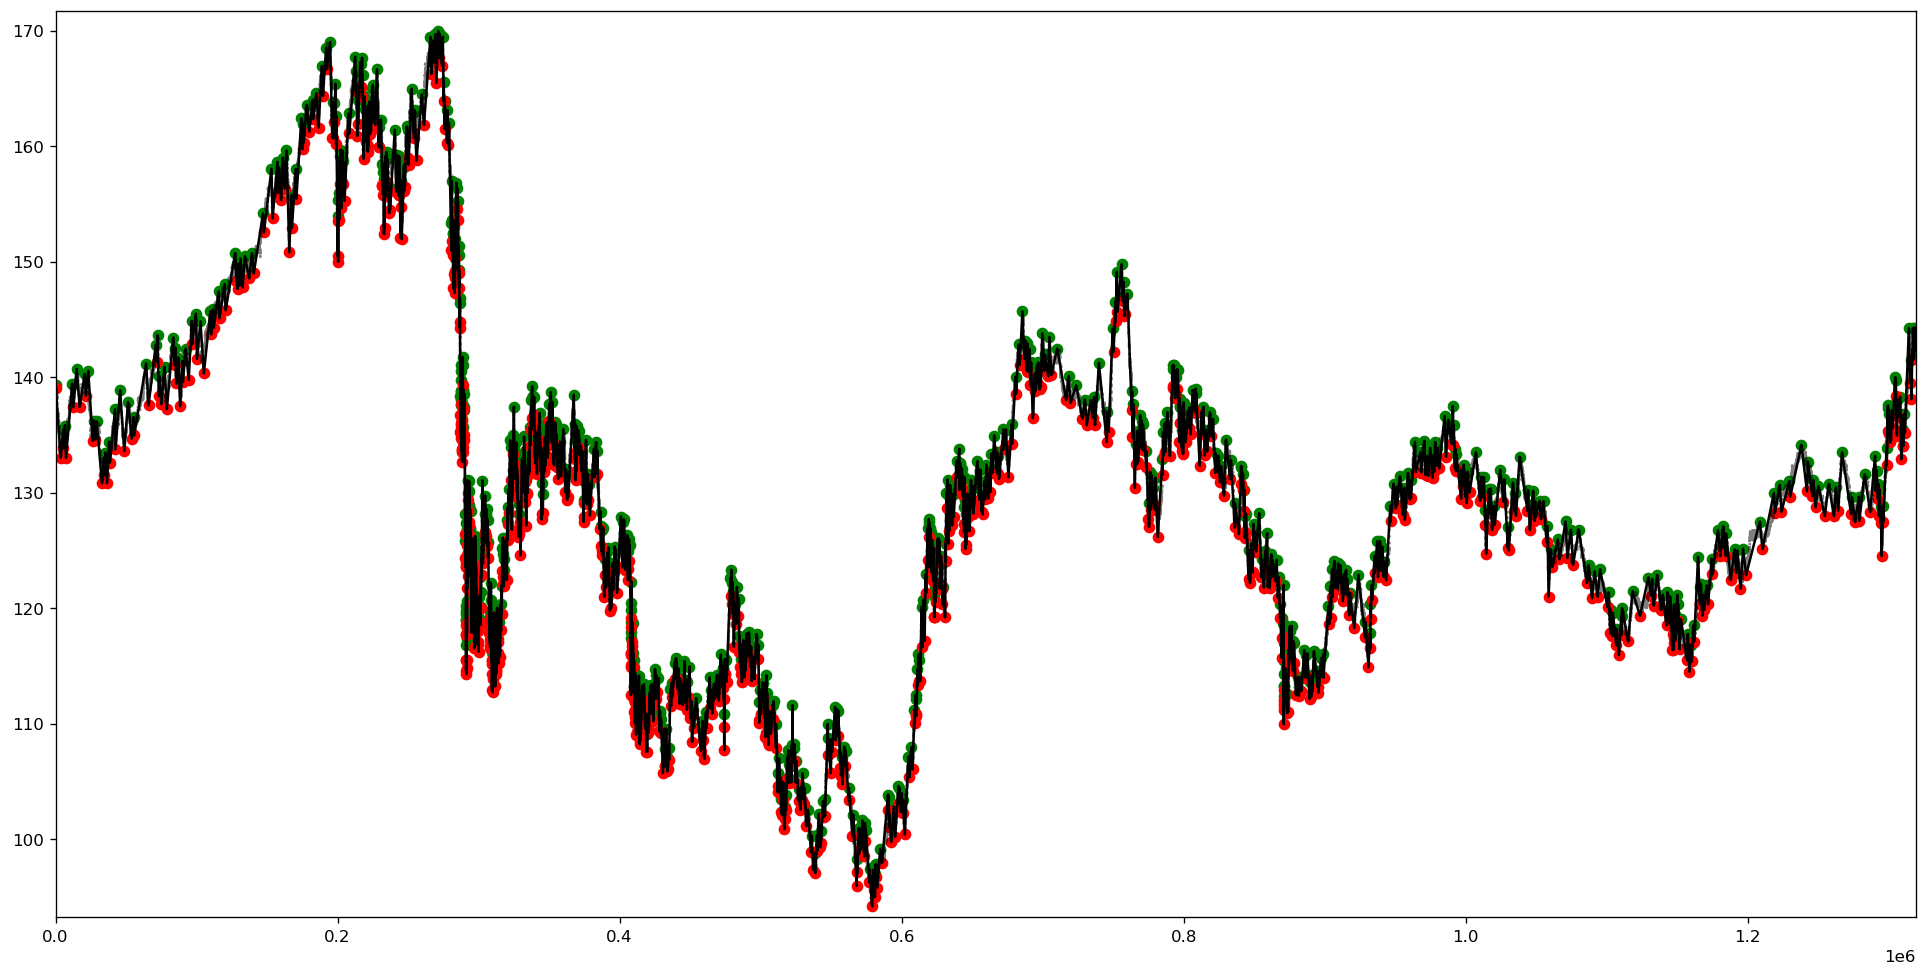

In [1539]:
plot_pivots(X, pivots)

In [1540]:
peak = compute_segment_returns(X, pivots == PEAK).index.tolist()

In [1541]:
valley = compute_segment_returns(X, pivots == VALLEY).index.tolist()

## add feature 

In [1542]:
df['peak']=np.zeros(len(df))    

In [1543]:
for i in range(len(peak)):
    if i+1<len(peak):
        if (0.99*df.high[peak[i+1]] < df.high[peak[i]]) and (df.high[peak[i]] < 1.01*df.high[peak[i+1]]):
            df.loc[[peak[i]],['peak']]=1
            df.loc[[peak[i+1]],['peak']]=1


In [1544]:
df['valley']=np.zeros(len(df))  

In [1545]:
for i in range(int(0.5*len(df.peak[df.peak==1]))):
    if (2*i+1)<(int(len(df.peak[df.peak==1]))):
        df.loc[[df.low[df.peak[df.peak==1].index.tolist()[2*i]:df.peak[df.peak==1].index.tolist()[2*i+1]].idxmin()],['valley']]=2
    

In [1546]:
len(df.peak[df.peak==1].index.tolist())

736

In [1547]:
len(df.valley[df.valley==2].index.tolist())

368

In [1548]:
def twopeak(x):
    if x['peak']==1:
        return x['high']+1e-3
    else:
        return np.nan
    
def neckpoints(x):
    if x['valley']==2:
        return x['low']-2e-3
    else:
        return np.nan

In [1549]:
df['twopeaks'] = df.apply(lambda row: twopeak(row), axis=1)
df['neckpoint'] = df.apply(lambda row: neckpoints(row), axis=1)

## visualization 

In [1550]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[20000:35000]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
fig.add_scatter(x=dfpl.index, y=dfpl['twopeaks'], mode="markers",
                marker=dict(size=5, color="blue"),
                name="top point")
fig.add_scatter(x=dfpl.index, y=dfpl['neckpoint'], mode="markers",
                marker=dict(size=5, color="black"),
                name="valley")
#fig.add_trace(go.Scatter(x=[54800,55600], y=[1.14755,1.14745], mode='lines', name='resistance line'))
#fig.add_trace(go.Scatter(x=[54800,55600], y=[1.1312,1.1313], mode='lines', name='support line'))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# double bottom 

In [1551]:
Y = df['low']
pivots = peak_valley_pivots(Y, 0.01, -0.01)

In [1552]:
def plot_pivots(Y, pivots):
    plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.xlim(0, len(Y))
    plt.ylim(X.min()*0.99, Y.max()*1.01)
    plt.plot(np.arange(len(Y)), Y, 'k:', alpha=0.5)
    plt.plot(np.arange(len(Y))[pivots != 0], Y[pivots != 0], 'k-')
    plt.scatter(np.arange(len(Y))[pivots == 1], Y[pivots == 1], color='g')
    plt.scatter(np.arange(len(Y))[pivots == -1], Y[pivots == -1], color='r')

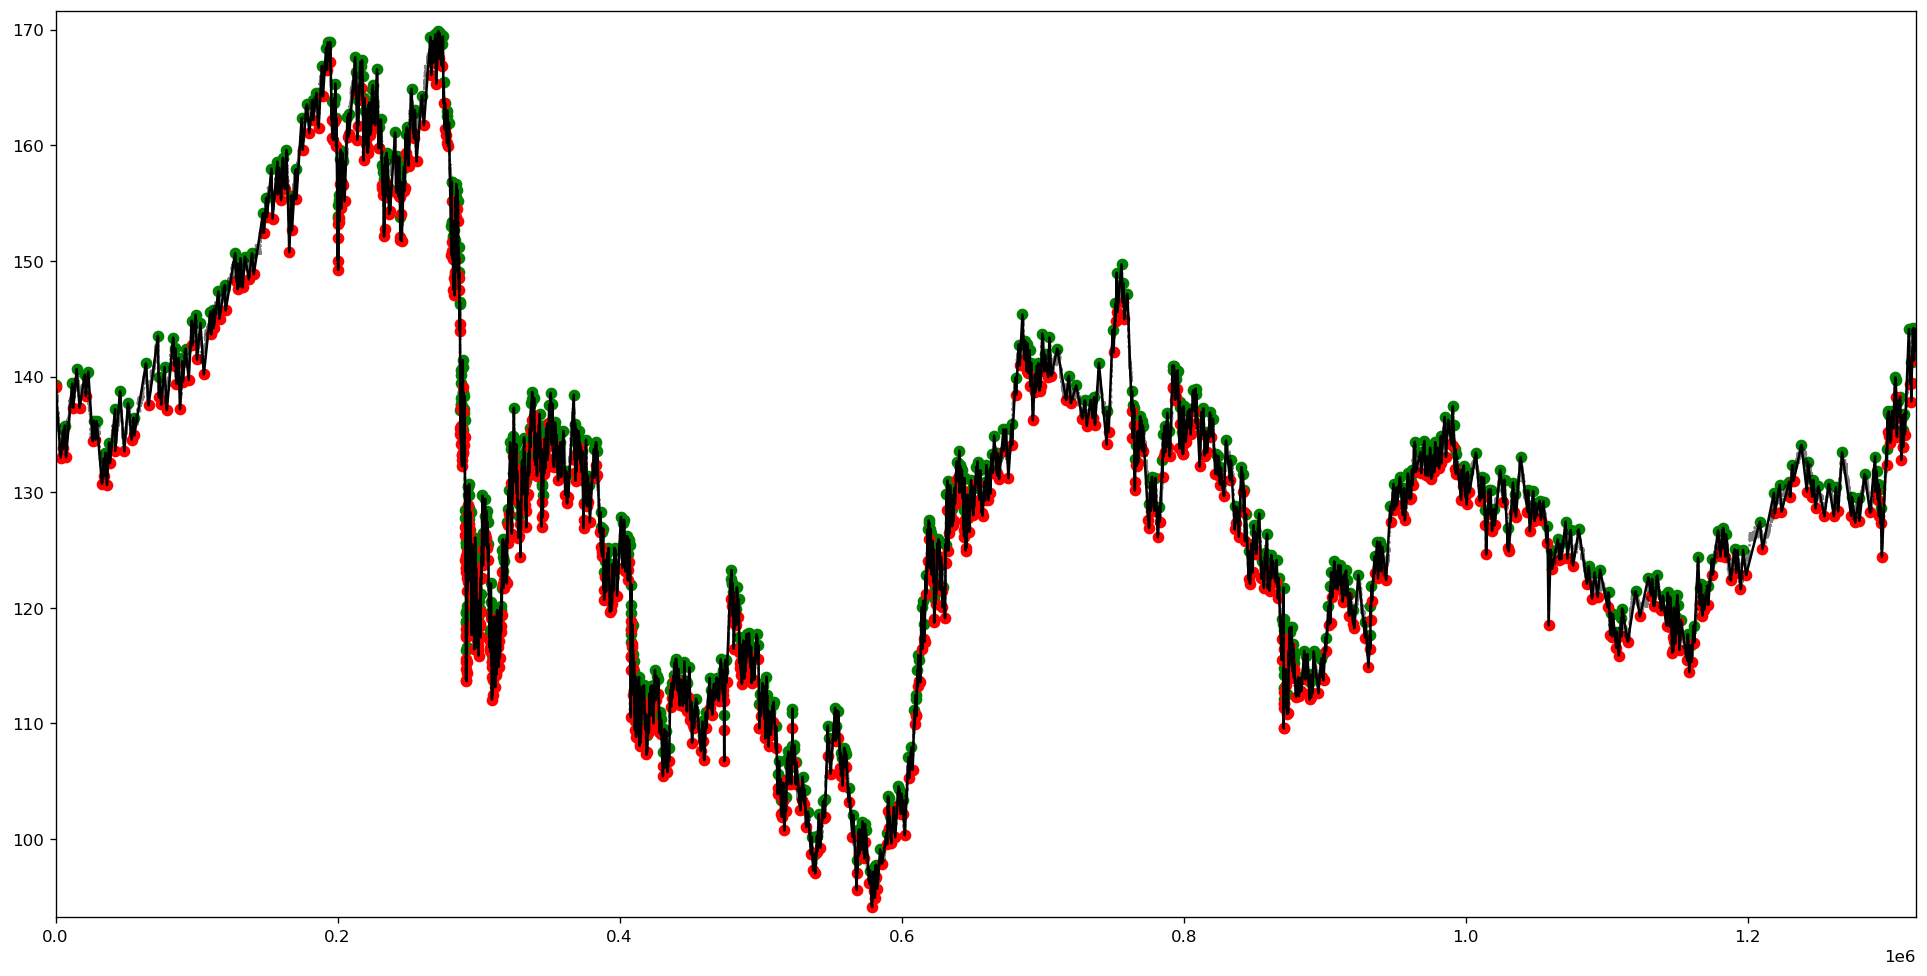

In [1553]:
plot_pivots(Y, pivots)

In [1554]:
valley = compute_segment_returns(Y, pivots == VALLEY).index.tolist()

## add feature 

In [1577]:
df['valley']=np.zeros(len(df)) 

In [1578]:
for i in range(len(valley)):
    if i+1<len(valley)-1:
        if (0.992*df.low[valley[i+1]] < df.low[valley[i]]) and (df.low[valley[i]] < 1.008*df.low[valley[i+1]]):
            df.loc[[valley[i]],['valley']]=2
            df.loc[[valley[i+1]],['valley']]=2

In [1579]:
len(df.valley[df.valley==2])

709

In [1580]:
df['peak']=np.zeros(len(df))  

In [1581]:
for i in range(int(0.5*len(df.valley[df.valley==2]))):
    if (2*i+1)<(int(len(df.valley[df.valley==2]))):
        df.loc[[df.high[df.valley[df.valley==2].index.tolist()[2*i]:df.valley[df.valley==2].index.tolist()[2*i+1]].idxmax()],['peak']]=1
    

In [1582]:
len(df.peak[df.peak==1])

354

In [1571]:
def twovalley(x):
    if x['valley']==2:
        return x['low']-1e-3
    else:
        return np.nan
def peakpoints(x):
    if x['peak']==1:
        return x['high']+ 2e-3
    else:
        return np.nan

In [1583]:
df['twovalleys'] = df.apply(lambda row: twovalley(row), axis=1)
df['peakpoint'] = df.apply(lambda row: peakpoints(row), axis=1)

## visualization 

In [1584]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[0:11800]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
fig.add_scatter(x=dfpl.index, y=dfpl['twovalleys'], mode="markers",
                marker=dict(size=5, color="blue"),
                name="bottom point")
fig.add_scatter(x=dfpl.index, y=dfpl['peakpoint'], mode="markers",
                marker=dict(size=5, color="black"),
                name="neckpoint")
#fig.add_trace(go.Scatter(x=[2400,2750], y=[1.06089,1.06090], mode='lines', name='resistance line'))
#fig.add_trace(go.Scatter(x=[2400,2750], y=[0.99566,0.9916], mode='lines', name='support line'))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()